In [90]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns

In [92]:
df = pd.read_csv("/Users/matteo/Documents/PersonalProjects/airbnb-pricing-optimization/data/listings-2.csv")

df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20250901181253,2025-09-01,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/be1bf5ac-a955...,1169,...,4.89,4.98,4.78,STR-0006854,f,1,1,0,0,2.53
1,5858,https://www.airbnb.com/rooms/5858,20250901181253,2025-09-01,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/hosting/Hosti...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.53
2,8014,https://www.airbnb.com/rooms/8014,20250901181253,2025-09-01,city scrape,female HOST quiet fast internet market parking,Room is on the second floor so it gets a good ...,"The neighborhood is very residential, close to...",https://a0.muscache.com/pictures/2cc1fc3d-0ae0...,22402,...,4.94,4.59,4.66,STR-0000974,f,3,0,3,0,0.57
3,8142,https://www.airbnb.com/rooms/8142,20250901181253,2025-09-01,city scrape,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/hosting/Hosti...,21994,...,4.80,4.70,4.70,NaN,f,20,0,20,0,0.07
4,8339,https://www.airbnb.com/rooms/8339,20250901181253,2025-09-01,city scrape,Historic Alamo Square Victorian,"For creative humans who love art, space, photo...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,1,1,0,0,0.13


In [94]:
# check for NAs

df.isna().sum().sort_values(ascending = False)

neighbourhood_group_cleansed    7780
calendar_updated                7780
neighborhood_overview           3097
neighbourhood                   3097
host_about                      3084
                                ... 
minimum_nights_avg_ntm             0
maximum_nights_avg_ntm             0
availability_30                    0
availability_60                    0
amenities                          0
Length: 79, dtype: int64

In [106]:
df["neighbourhood"]

0       Neighborhood highlights
1       Neighborhood highlights
2       Neighborhood highlights
3       Neighborhood highlights
4                           NaN
                 ...           
7775                        NaN
7776                        NaN
7777                        NaN
7778                        NaN
7779                        NaN
Name: neighbourhood, Length: 7780, dtype: object

In [100]:
# create new data set that will be the clean version of df
df_clean = df

# convert price to a float
df_clean["price"] = df_clean["price"].str.replace("$", "").str.replace(",", "").astype(float)

# save the observations with missing prices, and remove them from clean DF
df_missing_prices = df_clean[df_clean["price"].isna()]
df_clean = df_clean[df_clean["price"].isna() == False]

# log transform prices
df_clean["log_price"] = np.log(df_clean["price"])

# drop neighbourhood_group_cleansed and calendar_updated, as all entries have NAs
df_clean = df_clean.drop(columns = ["neighbourhood_group_cleansed", "calendar_updated"])

# change all NA's in license to "None" because NA means that no license is present
df_clean["license"] = df_clean["license"].fillna("None")

# remove listing with no host name
df_clean = df_clean[df_clean["host_name"].isna() == False]

# last review NA's renamed to "No reviews"
df_clean["last_review"] = df_clean["last_review"].fillna("No reviews")

# reviews per month NA's changed to 0's
df_clean["reviews_per_month"] = df_clean["reviews_per_month"].fillna(0)

/var/folders/l3/nx1r6y2154j6kp9618n899p80000gn/T/ipykernel_65403/3957008561.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [102]:
# check to make sure all NA's are handled
df_clean.isna().sum().sort_values(ascending = False)

neighbourhood            2258
neighborhood_overview    2258
host_about               2255
host_location            1236
review_scores_checkin    1154
                         ... 
amenities                   0
listing_url                 0
minimum_nights              0
maximum_nights              0
log_price                   0
Length: 78, dtype: int64

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5794 entries, 0 to 7779
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5794 non-null   int64  
 1   listing_url                                   5794 non-null   object 
 2   scrape_id                                     5794 non-null   int64  
 3   last_scraped                                  5794 non-null   object 
 4   source                                        5794 non-null   object 
 5   name                                          5794 non-null   object 
 6   description                                   5728 non-null   object 
 7   neighborhood_overview                         3536 non-null   object 
 8   picture_url                                   5794 non-null   object 
 9   host_id                                       5794 non-null   int64 

In [54]:
df_clean.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,958,https://www.airbnb.com/rooms/958,20250901181253,2025-09-01,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/be1bf5ac-a955...,1169,...,4.98,4.78,STR-0006854,f,1,1,0,0,2.53,5.056246
1,5858,https://www.airbnb.com/rooms/5858,20250901181253,2025-09-01,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/hosting/Hosti...,8904,...,4.77,4.68,None,f,1,1,0,0,0.53,5.521461
2,8014,https://www.airbnb.com/rooms/8014,20250901181253,2025-09-01,city scrape,female HOST quiet fast internet market parking,Room is on the second floor so it gets a good ...,"The neighborhood is very residential, close to...",https://a0.muscache.com/pictures/2cc1fc3d-0ae0...,22402,...,4.59,4.66,STR-0000974,f,3,0,3,0,0.57,4.204693
3,8142,https://www.airbnb.com/rooms/8142,20250901181253,2025-09-01,city scrape,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/hosting/Hosti...,21994,...,4.70,4.70,None,f,20,0,20,0,0.07,4.025352
4,8339,https://www.airbnb.com/rooms/8339,20250901181253,2025-09-01,city scrape,Historic Alamo Square Victorian,"For creative humans who love art, space, photo...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,4.94,4.75,STR-0000264,f,1,1,0,0,0.13,6.267201


/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 68'. Pick better value with 'binwidth'.


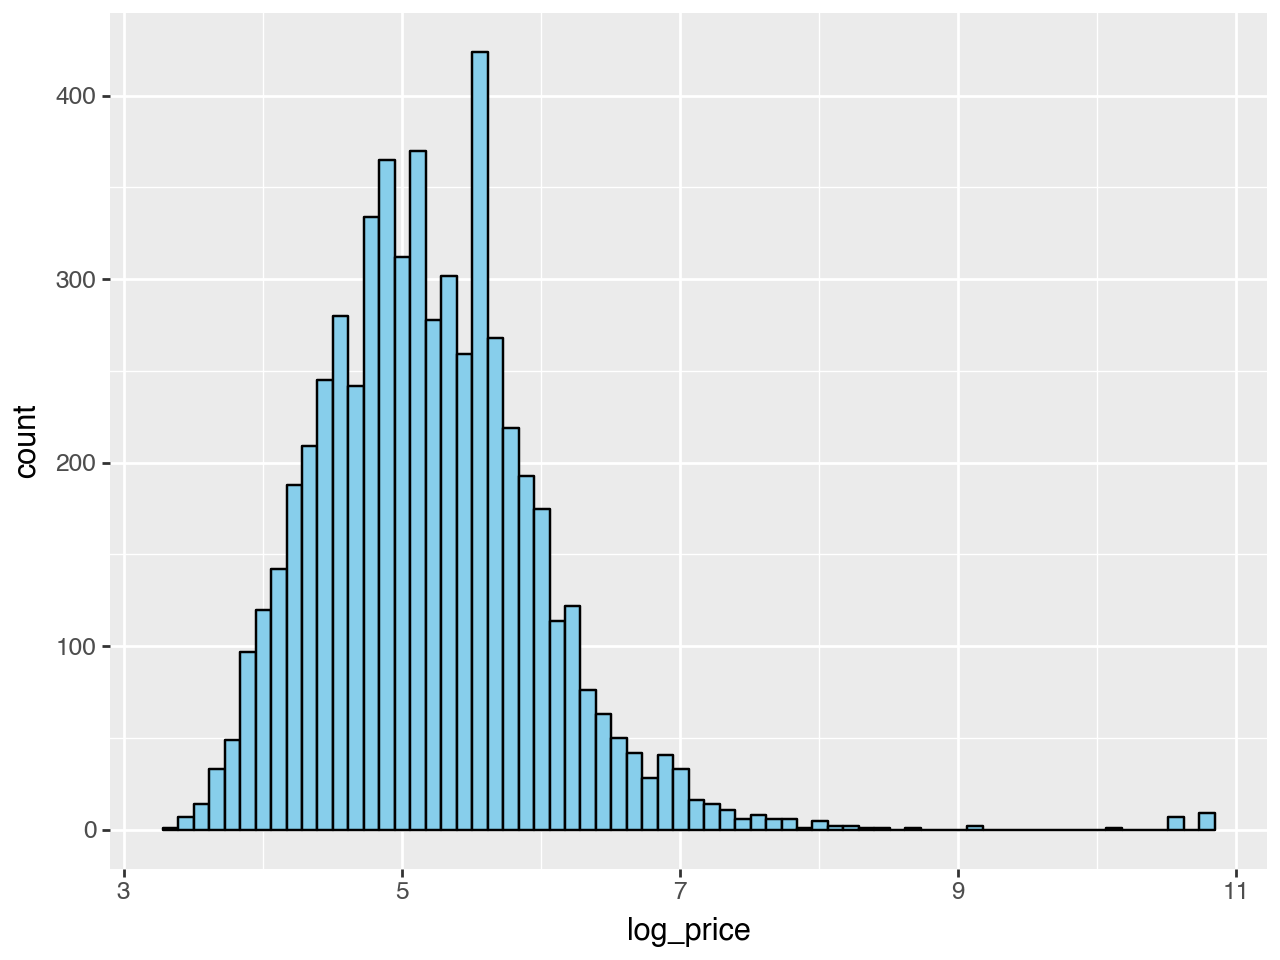

In [56]:
# testing log transform for price

(
    ggplot(df_clean, mapping = aes(x = "log_price")) +
           geom_histogram(fill = "skyblue", color = "black")
)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
quantitative_vars = ["latitude", "longitude", "minimum_nights", "number_of_reviews", 
                      "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm"]

categorical_vars = ["neighbourhood", "room_type"]

target = "log_price"

X = df_clean.drop(["id", "host_id", "price", "log_price", "name", "host_name", "last_review", "license"], axis = 1)
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# preprocessing

preproc = make_column_transformer(
    (StandardScaler(), quantitative_vars),
    (OneHotEncoder(), categorical_vars)
)

In [64]:
# define and fit model 

Linear_Pipeline = make_pipeline(
    preproc,
    LinearRegression()
)

Linear_Pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [66]:
y_pred = Linear_Pipeline.predict(X_test)

y_pred
np.ravel(y_test)

array([6.13988455, 5.35185813, 5.51342875, ..., 5.50533154, 4.17438727,
       4.24849524], shape=(1159,))

In [68]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.6278218263822377
0.46142515486739266
0.32770751958685007


In [38]:
preproc = Linear_Pipeline.named_steps["columntransformer"]
lin     = Linear_Pipeline.named_steps["linearregression"]


feat_names = preproc.get_feature_names_out()
coefs = lin.coef_.ravel()
coef_df = pd.DataFrame({"feature": feat_names, "coef": coefs})

In [40]:
coef_df.sort_values("coef", ascending = False)

,feature,coef
45,onehotencoder__room_type_Hotel room,1.279276
39,onehotencoder__neighbourhood_Treasure Island/YBI,0.828743
12,onehotencoder__neighbourhood_Diamond Heights,0.373001
33,onehotencoder__neighbourhood_Potrero Hill,0.323155
25,onehotencoder__neighbourhood_Noe Valley,0.308824
8,onehotencoder__neighbourhood_Bernal Heights,0.279081
9,onehotencoder__neighbourhood_Castro/Upper Market,0.273073
0,standardscaler__latitude,0.269219
44,onehotencoder__room_type_Entire home/apt,0.236804
16,onehotencoder__neighbourhood_Glen Park,0.164014
